## 1- Packages

Let's first import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a library to plot graphs in Python.
- [h5py](http://www.h5py.org) is a common package to interact with a dataset that is stored on an H5 file.
- [PIL](http://www.pythonware.com/products/pil/) and [scipy](https://www.scipy.org/) are used here to test your model with your own picture at the end.
- dnn_app_utils provides the functions implemented in the "Building your Deep Neural Network: Step by Step" assignment to this notebook.
- np.random.seed(1) is used to keep all the random function calls consistent. It will help us grade your work.

In [95]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import skimage
from dnn_app_utils_v2  import *

%matplotlib inline
# plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
# plt.rcParams['image.interpolation'] = 'nearest'
# plt.rcParams['image.cmap'] = 'gray'

# %load_ext autoreload
# %autoreload 2

np.random.seed(1)

## 2- Dataset

## 2 - Dataset

You will use the same "Cat vs non-Cat" dataset as in "Logistic Regression as a Neural Network" (Assignment 2). The model you had built had 70% test accuracy on classifying cats vs non-cats images. Hopefully, your new model will perform a better!

**Problem Statement**: You are given a dataset ("data.h5") containing:
    - a training set of m_train images labelled as cat (1) or non-cat (0)
    - a test set of m_test images labelled as cat and non-cat
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB).

Let's get more familiar with the dataset. Load the data by running the cell below.

In [96]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 0. It's a non-cat picture.


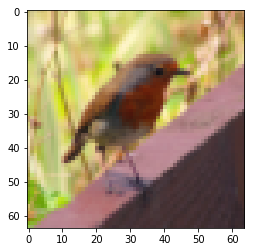

In [97]:
# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " +
       classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [98]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


As usual, you reshape and standardize the images before feeding them to the network. The code is given in the cell below.


In [99]:
# ttt=np.random.randn(2,2,2,2)
# ttt[0][0]=[[1,11],[2,22]]
# ttt[0][1]=[[3,33],[4,44]]
# ttt[1][0]=[[5,55],[6,66]]
# ttt[1][1]=[[7,77],[8,88]]
ttt=np.random.randn(2,2,2)
ttt[0]=[[1,11],[2,22]]
ttt[1]=[[3,33],[4,44]]
# ttt[0]=[[5,55],[6,66]]
# ttt[1]=[[7,77],[8,88]]


ttt

array([[[ 1., 11.],
        [ 2., 22.]],

       [[ 3., 33.],
        [ 4., 44.]]])

In [100]:
ttt.reshape(ttt.shape[0],-1).shape
ttt.reshape(1,-1).T



array([[ 1.],
       [11.],
       [ 2.],
       [22.],
       [ 3.],
       [33.],
       [ 4.],
       [44.]])

In [101]:
train_x_orig[index]

array([[[188, 180, 119],
        [207, 197, 141],
        [217, 206, 145],
        ...,
        [190, 150,  96],
        [181, 142,  89],
        [195, 150, 102]],

       [[198, 188, 126],
        [214, 203, 145],
        [226, 216, 146],
        ...,
        [163, 135,  74],
        [165, 130,  78],
        [183, 138,  90]],

       [[206, 197, 135],
        [222, 209, 150],
        [234, 219, 158],
        ...,
        [157, 132,  69],
        [166, 127,  74],
        [173, 126,  76]],

       ...,

       [[154, 115,  25],
        [138, 143,  22],
        [131, 162,  20],
        ...,
        [ 59,  44,  49],
        [ 59,  43,  48],
        [ 55,  42,  48]],

       [[133, 171,  27],
        [137, 178,  45],
        [148, 169,  56],
        ...,
        [ 60,  43,  46],
        [ 58,  43,  45],
        [ 53,  40,  44]],

       [[151, 196,  79],
        [157, 173, 103],
        [173, 144, 125],
        ...,
        [ 57,  41,  43],
        [ 58,  44,  46],
        [ 59,  43,  49]]

In [102]:
train_x_orig[index].reshape(-1).T

array([188, 180, 119, ...,  59,  43,  49], dtype=uint8)

In [103]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


### 3- Architechture of the model

Detailed Architecture :

- The input is a (64,64,3) image which is flattened to a vector of size (12288,1).
- The corresponding vector: $[x_0,x_1,...,x_{12287}]^T$ is then multiplied by the weight matrix $W^{[1]}$ and then you add the intercept $b^{[1]}$. The result is called the linear unit.
- Next, you take the relu of the linear unit. This process could be repeated several times for each $(W^{[l]}, b^{[l]})$ depending on the model architecture.
- Finally, you take the sigmoid of the final linear unit. If it is greater than 0.5, you classify it to be a cat.

As usual you will follow the Deep Learning methodology to build the model:
    1. Initialize parameters / Define hyperparameters
    2. Loop for num_iterations:
        a. Forward propagation
        b. Compute cost function
        c. Backward propagation
        d. Update parameters (using parameters, and grads from backprop) 
    4. Use trained parameters to predict labels

## 4 - Two-layer neural network

In [104]:
n_x=12288
n_h=7
n_y=1
layers_dims=[n_x,n_h,n_y]

In [105]:
def two_layer_model(X,Y,layers_dims,learning_rate=0.0075,
                    num_iterations=3000,print_cost=False):
    
    np.random.seed(1)
    m=X.shape[1]
    grads={}
    costs=[]
    n_x,n_h,n_y=layers_dims
    parameters=initialize_parameters(n_x,n_h,n_y)
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    for i in range(num_iterations):
        A1,cache1=linear_activation_forward(X,W1,b1,activation='relu')
        A2,cache2=linear_activation_forward(A1,W2,b2,activation='sigmoid')
        
        cost=compute_cost(A2,Y)
        
        dA2=-(np.divide(Y,A2)-np.divide(1-Y,1-A2))
        
        dA1,dW2,db2=linear_activation_backward(dA2,cache2,activation='sigmoid')
        dA0,dW1,db1=linear_activation_backward(dA1,cache1,activation='relu')
        
        grads["dW1"]=dW1
        grads["db1"]=db1
        grads["dW2"]=dW2
        grads["db2"]=db2
        
        parameters=update_parameters(parameters,grads,learning_rate=learning_rate)
        
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        if print_cost and i%100==0:
            print("Cost after iteration {}: {}".format(i,np.squeeze(cost)))
            costs.append(cost)
            
#     plt.plot(np.squeeze(costs))
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters
    
        
        
        
    

Cost after iteration 0: 0.6930497356599888
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912677
Cost after iteration 300: 0.6015024920354664
Cost after iteration 400: 0.5601966311605748
Cost after iteration 500: 0.5158304772764729
Cost after iteration 600: 0.4754901313943325
Cost after iteration 700: 0.43391631512257495
Cost after iteration 800: 0.4007977536203889
Cost after iteration 900: 0.3580705011323798
Cost after iteration 1000: 0.3394281538366412
Cost after iteration 1100: 0.3052753636196265
Cost after iteration 1200: 0.2749137728213016
Cost after iteration 1300: 0.24681768210614838
Cost after iteration 1400: 0.19850735037466116
Cost after iteration 1500: 0.17448318112556654
Cost after iteration 1600: 0.17080762978095898
Cost after iteration 1700: 0.11306524562164738
Cost after iteration 1800: 0.09629426845937153
Cost after iteration 1900: 0.08342617959726858
Cost after iteration 2000: 0.0743907870431908
Cost after iteration 2100: 0.066307481

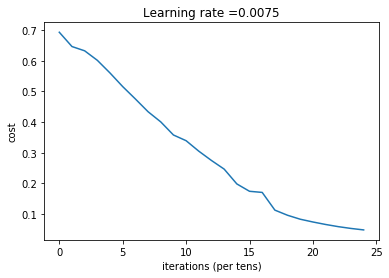

In [106]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

Good thing you built a vectorized implementation! Otherwise it might have taken 10 times longer to train this.

Now, you can use the trained parameters to classify images from the dataset. To see your predictions on the training and test sets, run the cell below.

In [107]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 0.9999999999999998


In [108]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.72


**Note**: You may notice that running the model on fewer iterations (say 1500) gives better accuracy on the test set. This is called "**early stopping**" and we will talk about it in the next course. Early stopping is a way to prevent **overfitting**. 

Congratulations! It seems that your 2-layer neural network has better performance (72%) than the logistic regression implementation (70%, assignment week 2). Let's see if you can do even better with an $L$-layer model.

## 5- L-layer Neural Network



In [109]:
layers_dims=[12288,20,7,5,1]

In [110]:
def L_layer_model(X,Y,layers_dims,learning_rate=0.0075
                  ,num_iterations=3000,print_cost=False):
    
    np.random.seed(1)
    
    costs=[]
#     grads={}
    L=len(layers_dims)
    
    parameters=initialize_parameters_deep(layers_dims)
    
    
    
    for i in range(num_iterations):
        
        parameters["A"+str(L)],caches=L_model_forward(X,parameters)
        
        cost=compute_cost(parameters["A"+str(L)],Y)
        
        grads=L_model_backward(parameters["A"+str(L)],Y,caches)
        
        parameters=update_parameters(parameters,grads,learning_rate)
        
        if print_cost and i %100==0:
            print("Cost after iteration {}:{}".format(i,cost))
            costs.append(cost)
        
    plt.plot(np.squeeze(costs))
    plt.ylabel("")
    plt.xlabel("")
    plt.title("Learning rate ="+str(learning_rate))
    plt.show()
    
    return parameters
    
    

Cost after iteration 0:0.7717493284237686
Cost after iteration 100:0.6720534400822914
Cost after iteration 200:0.6482632048575212
Cost after iteration 300:0.6115068816101354
Cost after iteration 400:0.5670473268366111
Cost after iteration 500:0.54013766345478
Cost after iteration 600:0.5279299569455267
Cost after iteration 700:0.46547737717668514
Cost after iteration 800:0.36912585249592794
Cost after iteration 900:0.39174697434805356
Cost after iteration 1000:0.3151869888600617
Cost after iteration 1100:0.2726998441789385
Cost after iteration 1200:0.23741853400268134
Cost after iteration 1300:0.19960120532208644
Cost after iteration 1400:0.18926300388463302
Cost after iteration 1500:0.1611885466582775
Cost after iteration 1600:0.14821389662363316
Cost after iteration 1700:0.13777487812972944
Cost after iteration 1800:0.1297401754919012
Cost after iteration 1900:0.12122535068005212
Cost after iteration 2000:0.11382060668633712
Cost after iteration 2100:0.10783928526254133
Cost after it

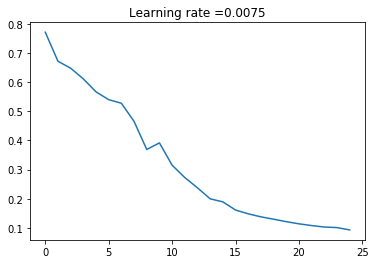

In [111]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

In [112]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9856459330143539


In [113]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.8


## Test with your own image (optional/ungraded excercise)

Accuracy: 1.0
y = 1.0, your L-layer model predicts a "cat" picture.


/Users/raka/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/raka/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


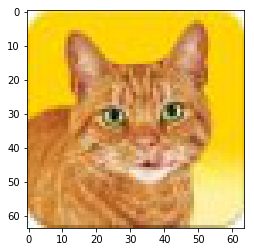

In [118]:
## START CODE HERE ##
my_image = "my_image.jpg" # change this to the name of your image file 
my_image = "m1.jpg"
my_label_y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)
## END CODE HERE ##

fname = "images/" + my_image
image = np.array(plt.imread(fname))
my_image = skimage.transform.resize(image, output_shape=(num_px,num_px)).reshape((num_px*num_px*3,1))
my_predicted_image = predict(my_image, my_label_y, parameters)

plt.imshow(image)
print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")